In [1]:
import numpy as np

import pandas as pd
from pandas.tools.plotting import scatter_matrix

import matplotlib.pyplot as plt
import ggplot

%matplotlib inline

In [2]:
red_wine = pd.read_csv('winequality-red.csv',sep=';')
white_wine = pd.read_csv('winequality-white.csv',sep=';')

In [3]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 162.4 KB


In [4]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


In [5]:
y_red_wine = red_wine['quality']
x_red_wine = red_wine.drop('quality', 1)

In [6]:
x_red_wine.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10e496190>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1174c1050>]], dtype=object)

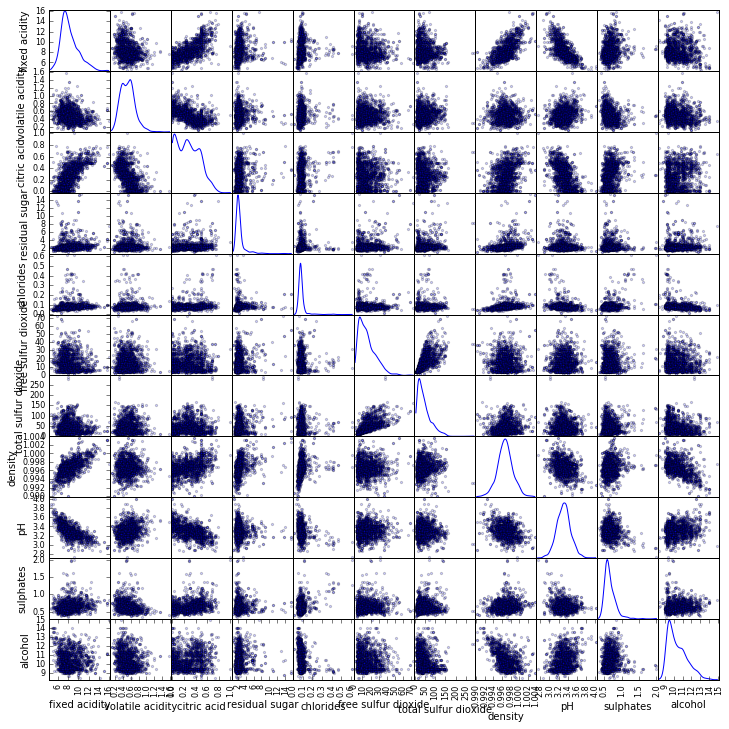

In [7]:
scatter_matrix(x_red_wine, alpha=0.2, figsize=(12, 12), diagonal='kde')

Notes: There appears to be a collinearity between pH and fixed acidity and density and fixed acidity. I will drop fixed acidity.

In [8]:
abs(x_red_wine.max() - x_red_wine.mean()) / x_red_wine.std()

fixed acidity            4.353787
volatile acidity         5.876138
citric acid              3.742403
residual sugar           9.192806
chlorides               11.123555
free sulfur dioxide      5.365606
total sulfur dioxide     7.372847
density                  3.678904
pH                       4.526866
sulphates                7.916200
alcohol                  4.201138
dtype: float64

Residual sugar en chlorides show outliers. I will drop values above 8 standard deviations from the mean.

## Clean up the data

In [9]:
y_red_wine = red_wine['quality']
x_red_wine = red_wine.drop(['quality','fixed acidity'], 1)

In [10]:
def outliers(df, threshold):
    for col in df.columns.values: 
        df[col][df[col] > float(threshold)*df[col].std()+df[col].mean()] = np.nan
    return df

In [11]:
x_red_wine_trim = x_red_wine.copy()

In [12]:
x_red_wine_trim = outliers(x_red_wine_trim, 8.)

In [13]:
(x_red_wine_trim.max() - x_red_wine.mean()) / x_red_wine.std()

volatile acidity        5.876138
citric acid             3.742403
residual sugar          7.987070
chlorides               7.107857
free sulfur dioxide     5.365606
total sulfur dioxide    7.372847
density                 3.678904
pH                      4.526866
sulphates               7.916200
alcohol                 4.201138
dtype: float64

In [14]:
#scatter_matrix(x_red_wine_trim, alpha=0.2, figsize=(12, 12), diagonal='kde')

In [15]:
x_red_wine.describe().T

,count,mean,std,min,25%,50%,75%,max
volatile acidity,1599,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000
alcohol,1599,10.422983,1.065668,8.40000,9.5000,10.20000,11.100000,14.90000


In [16]:
x_red_wine_trim.describe().T

,count,mean,std,min,25%,50%,75%,max
volatile acidity,1599,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1595,2.507429,1.264117,0.90000,1.9000,2.20000,2.600000,13.80000
chlorides,1595,0.086337,0.041193,0.01200,0.0700,0.07900,0.090000,0.42200
free sulfur dioxide,1599,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000
alcohol,1599,10.422983,1.065668,8.40000,9.5000,10.20000,11.100000,14.90000


## Prepare data for Tensor Flow

### Convert y-labels to one hot vectors

In [17]:
red_wine_quality = np.sort(y_red_wine.unique())

In [83]:
print red_wine_quality

[3 4 5 6 7 8]


In [18]:
y_red_wine_list = y_red_wine.tolist()

In [19]:
y_red_wine_list_oh = np.zeros((len(y_red_wine_list),len(red_wine_quality)))

In [20]:
j = 0
for i in y_red_wine_list:
    booleanFilter = np.array([red_wine_quality == i])
    y_red_wine_list_oh[j] = booleanFilter
    j = j + 1
    
print y_red_wine_list_oh.shape    

(1599, 6)


In [1]:
print y_red_wine_list_oh[0:5,:], y_red_wine_list[0:5].T

NameError: name 'y_red_wine_list_oh' is not defined

Split the data into test and train datasets.

In [21]:
y_red_wine_train = y_red_wine_list_oh[0:1438]

In [22]:
y_red_wine_test = y_red_wine_list_oh[1438:]

In [23]:
x_red_wine_train = x_red_wine_trim[0:1438]

In [24]:
x_red_wine_test = x_red_wine_trim[1438:]

Define the model:

In [25]:
import tensorflow as tf

In [40]:
print x_red_wine_train.shape

(1438, 10)


In [41]:
print y_red_wine_train.shape

(1438, 6)


In [45]:
x = tf.placeholder(tf.float32, [None, 10])

In [46]:
W = tf.Variable(tf.zeros([10,6]))

In [47]:
b = tf.Variable(tf.zeros([6]))

In [48]:
y = tf.nn.softmax(tf.matmul(x, W) + b)

Train the model:

In [49]:
y_ = tf.placeholder(tf.float32, [None, 6])

In [50]:
cross_entropy = -tf.reduce_sum(y_*tf.log(y))

In [73]:
train_step = tf.train.GradientDescentOptimizer(.001).minimize(cross_entropy)

In [74]:
init = tf.initialize_all_variables()

In [75]:
sess = tf.Session()
sess.run(init)

In [90]:
from input_data import *

In [91]:
for i in range(100):
  batch_xs, batch_ys = x_red_wine_train.next_batch(10)
  sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

AttributeError: 'DataFrame' object has no attribute 'next_batch'

Evaluate the model:

In [77]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))

In [78]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

In [79]:
print(sess.run(accuracy, feed_dict={x: x_red_wine_test, y_: y_red_wine_test}))

0.0186335
